In [1]:
##importing the required libraries for Analysis

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.graphics.tsaplots as sgt
import statsmodels.graphics.tsaplots as tsa_plots

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,index_col='Quarter',parse_dates=True)

In [3]:
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [4]:
df.index.freq = 'QS'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [6]:
df.index.freq

'QS'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [8]:
df.fillna(method='ffill')

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().any()

Sales    False
dtype: bool

In [11]:
df.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [12]:
df.shape

(42, 1)

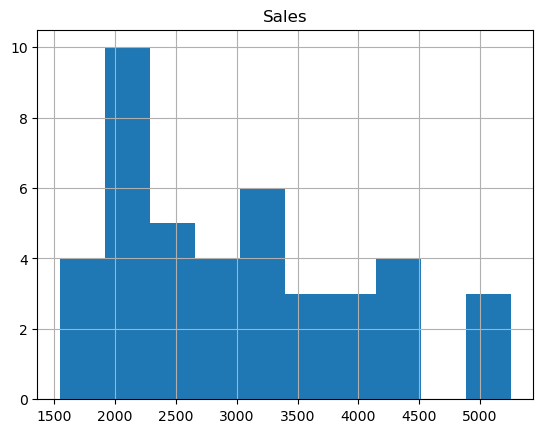

In [13]:
df.hist()
plt.show()

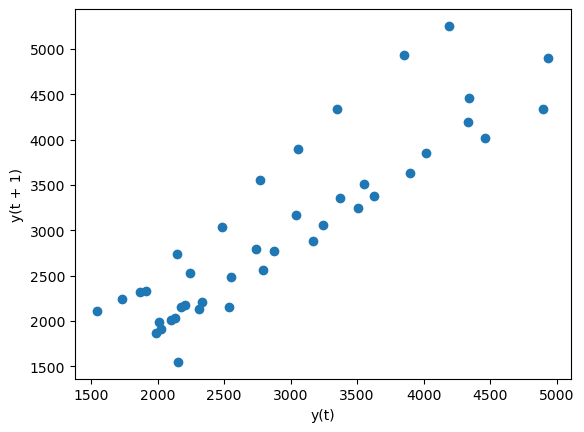

In [14]:
##Lag_plot
lag_plot(df)
plt.show()

<AxesSubplot:xlabel='Sales'>

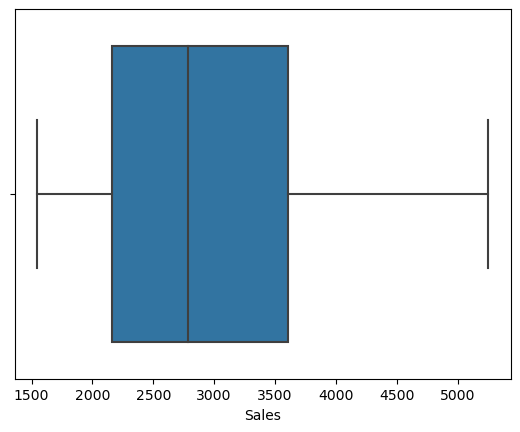

In [15]:
sns.boxplot("Sales",data=df)

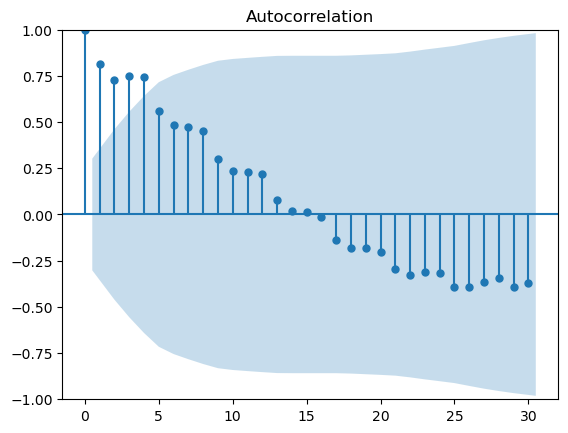

In [16]:
#Autocorrelation Plot
plot_acf(df,lags=30)
plt.show()

<AxesSubplot:xlabel='Quarter'>

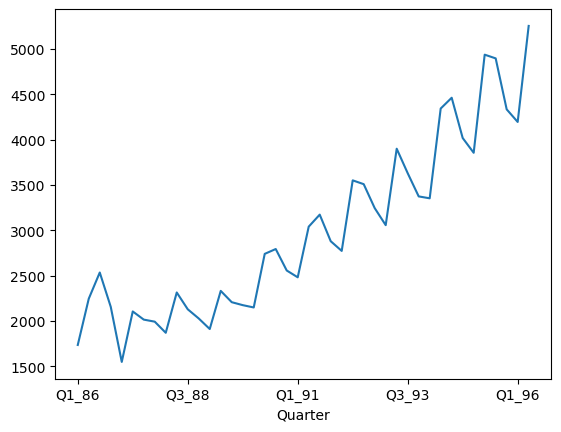

In [17]:
df.Sales.plot()

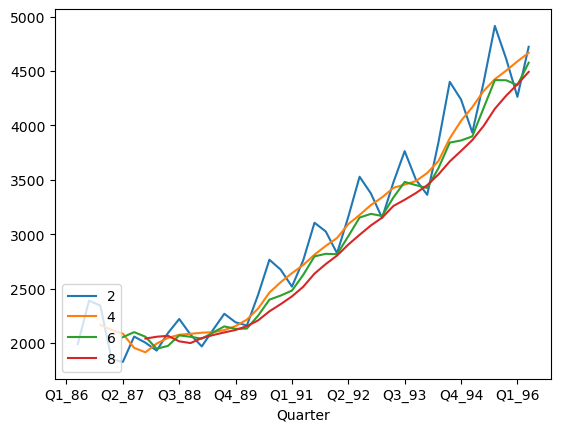

In [18]:
for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

#### Total Quater =42 (10.5 years)
###### Train Data= 32Quater (8 years)
###### Test Data= 10 Quater  (2.5 years)

In [19]:
train_data = df.iloc[:32] 
test_data = df.iloc[32:]

In [20]:
train_data.shape, test_data.shape

((32, 1), (10, 1))

In [21]:
train_data.tail()

,Sales
Quarter,
Q4_92,3243.859993
Q1_93,3056.000000
Q2_93,3899.000000
Q3_93,3629.000000
Q4_93,3373.000000


In [22]:
test_data

,Sales
Quarter,
Q1_94,3352.0
Q2_94,4342.0
Q3_94,4461.0
Q4_94,4017.0
Q1_95,3854.0
Q2_95,4936.0
Q3_95,4895.0
Q4_95,4333.0
Q1_96,4194.0


<AxesSubplot:xlabel='Quarter'>

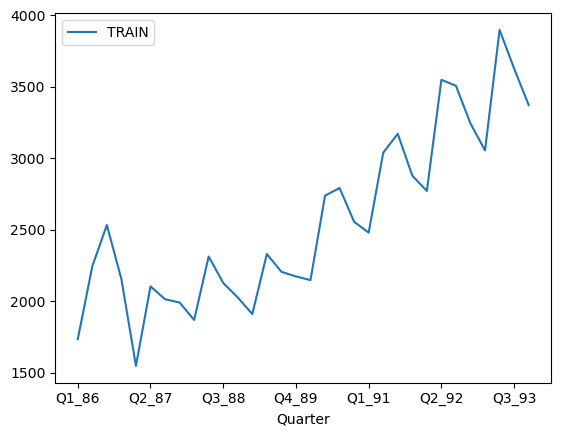

In [23]:
train_data['Sales'].plot(legend=True,label='TRAIN')

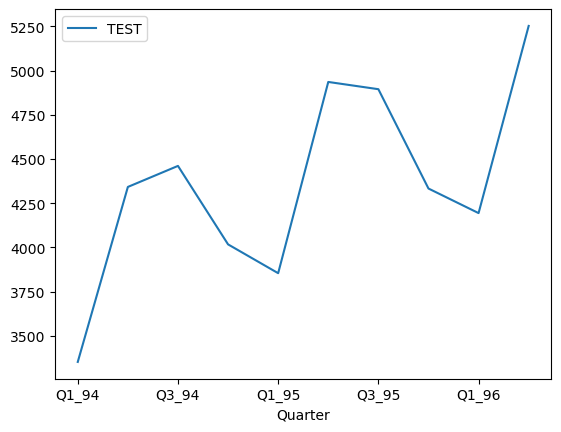

In [24]:
test_data['Sales'].plot(legend=True,label='TEST');

## SimpleExpSmoothing

In [25]:
alpha = 0.15

In [26]:
model_ses12=SimpleExpSmoothing(train_data['Sales'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

Quarter
Q1_86    1734.827000
Q2_86    1734.827000
Q3_86    1811.347099
Q4_86    1919.715783
Q1_87    1955.002866
Q2_87    1893.925285
Q3_87    1925.498292
Q4_87    1938.827998
Q1_88    1946.765848
Q2_88    1935.108470
Q3_88    1991.886999
Q4_88    2012.351949
Q1_89    2014.523507
Q2_89    1998.935580
Q3_89    2048.769992
Q4_89    2072.436993
Q1_90    2087.666643
Q2_90    2096.758346
Q3_90    2193.140794
Q4_90    2283.082775
Q1_91    2324.021858
Q2_91    2347.564679
Q3_91    2451.358426
Q4_91    2559.472062
Q1_92    2607.401403
Q2_92    2632.091192
Q3_92    2769.777513
Q4_92    2880.510886
Q1_93    2935.013252
Q2_93    2953.161265
Q3_93    3095.037075
Q4_93    3175.131514
dtype: float64

In [27]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Sales,SES12
Quarter,,
Q1_86,1734.827000,1734.827000
Q2_86,2244.960999,1811.347099
Q3_86,2533.804993,1919.715783
Q4_86,2154.962997,1955.002866
Q1_87,1547.818996,1893.925285


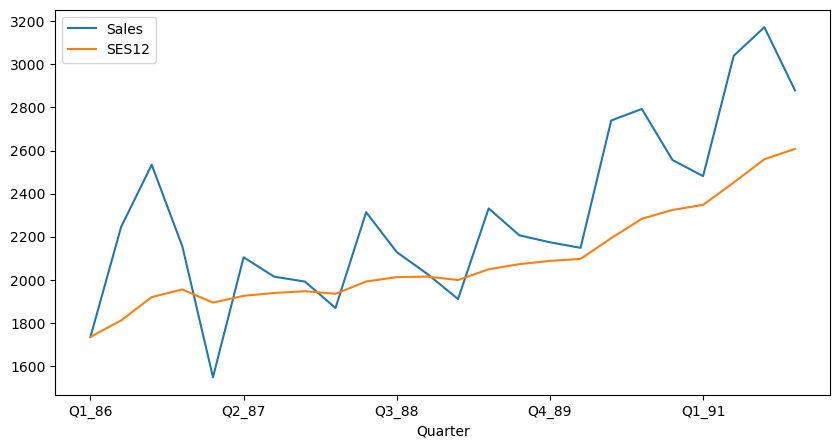

In [28]:
df[['Sales','SES12']].iloc[:24].plot(figsize=(10,5));

In [29]:
test_predictions =fitted_model.forecast(10)

In [30]:
test_predictions

32    3204.811787
33    3204.811787
34    3204.811787
35    3204.811787
36    3204.811787
37    3204.811787
38    3204.811787
39    3204.811787
40    3204.811787
41    3204.811787
dtype: float64

In [31]:
mean_squared_error(test_data,test_predictions)

1627409.1012144587

In [32]:
rmse_simple= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_simple

1275.6994556769469

## Double Exponential Smoothing (trend-Add)

In [33]:
mod_add12 = ExponentialSmoothing(train_data['Sales'], trend='add')
fitted_model= mod_add12.fit()
df['DESadd12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Sales,SES12,DESadd12
Quarter,,,
Q1_86,1734.827000,1734.827000,1925.567816
Q2_86,2244.960999,1811.347099,1990.769510
Q3_86,2533.804993,1919.715783,2139.833300
Q4_86,2154.962997,1955.002866,2164.184244
Q1_87,1547.818996,1893.925285,2003.520445


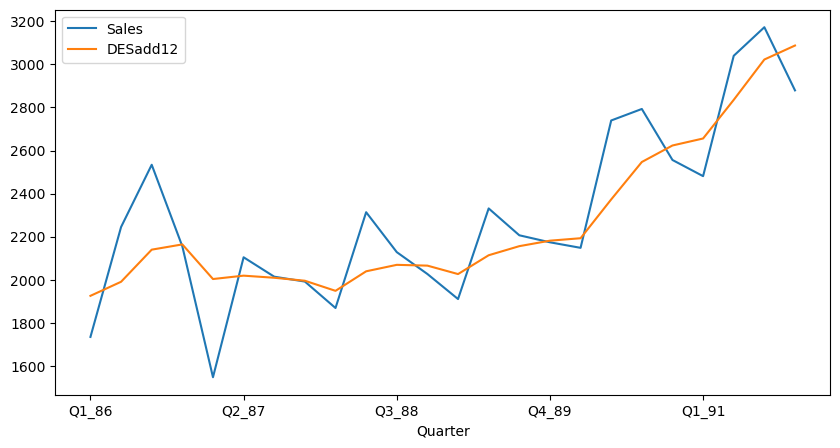

In [34]:
df[['Sales','DESadd12']].iloc[:24].plot(figsize=(10,5));

In [35]:
test_predictions =fitted_model.forecast(10)

In [36]:
test_predictions.head()

32    3754.220309
33    3829.782157
34    3905.344005
35    3980.905852
36    4056.467700
dtype: float64

In [37]:
mean_squared_error(test_data,test_predictions)

259402.01310606115

In [38]:
rmse_DEadd= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_DEadd

509.31523942059806

## Double Exponential Smoothing (trend-mul)

In [39]:
mod_mul12 = ExponentialSmoothing(train_data['Sales'], trend='mul')
fitted_model= mod_mul12.fit()
df['DESmul12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Sales,SES12,DESadd12,DESmul12
Quarter,,,,
Q1_86,1734.827000,1734.827000,1925.567816,1926.069600
Q2_86,2244.960999,1811.347099,1990.769510,2017.546016
Q3_86,2533.804993,1919.715783,2139.833300,2186.852116
Q4_86,2154.962997,1955.002866,2164.184244,2205.670060
Q1_87,1547.818996,1893.925285,2003.520445,2025.770934


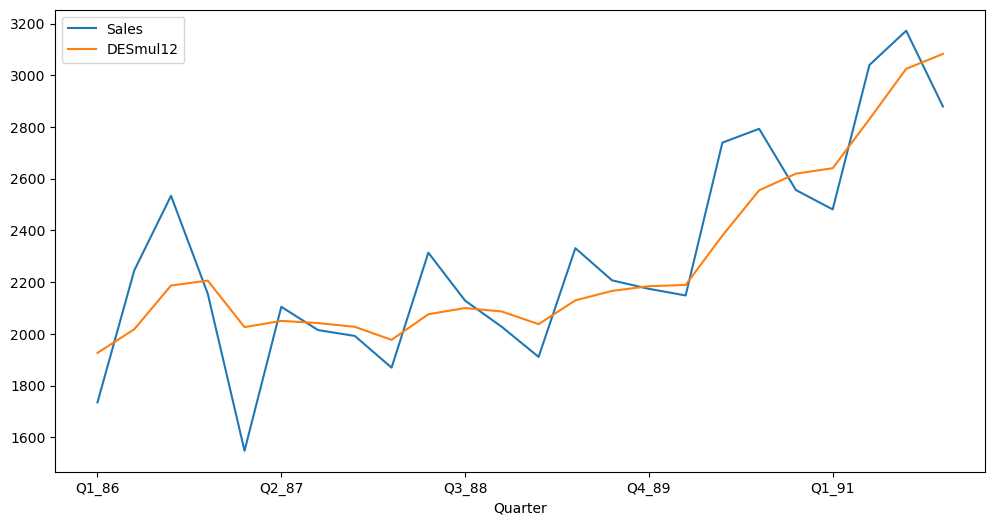

In [40]:
df[['Sales','DESmul12']].iloc[:24].plot(figsize=(12,6));

In [41]:
test_predictions =fitted_model.forecast(10)

In [42]:
mean_squared_error(test_data,test_predictions)

181126.7733408366

In [43]:
rmse_DEmul= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_DEmul

425.58991216996276

## Triple Exponential Smoothing

In [44]:
tes_add12 = ExponentialSmoothing(train_data['Sales'], trend='add',seasonal='add',seasonal_periods=4)
fitted_model= tes_add12.fit()
df['TESadd12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12
Quarter,,,,,
Q1_86,1734.827000,1734.827000,1925.567816,1926.069600,2314.503352
Q2_86,2244.960999,1811.347099,1990.769510,2017.546016,2217.574327
Q3_86,2533.804993,1919.715783,2139.833300,2186.852116,2226.937150
Q4_86,2154.962997,1955.002866,2164.184244,2205.670060,1993.286312
Q1_87,1547.818996,1893.925285,2003.520445,2025.770934,2227.187938


<AxesSubplot:xlabel='Quarter'>

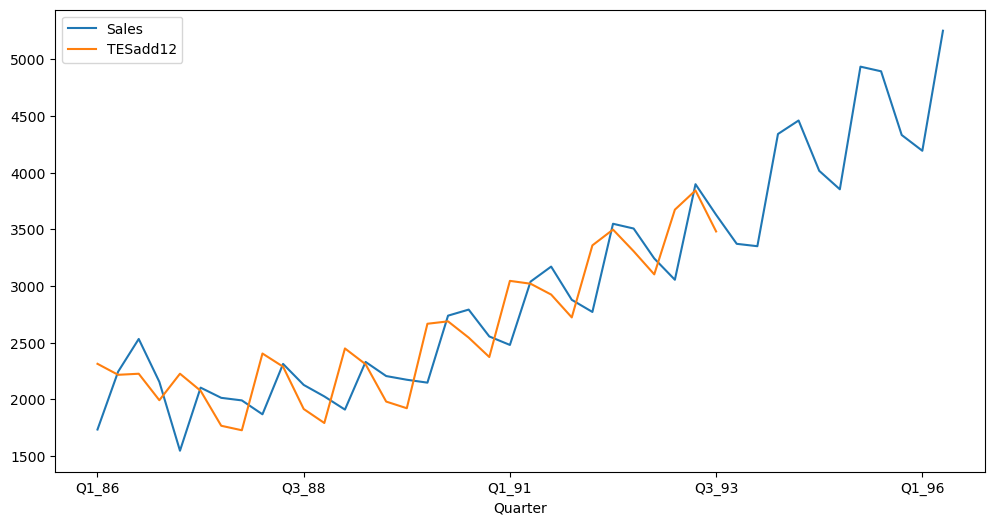

In [45]:
df[['Sales','TESadd12']].plot(figsize=(12,6))

In [46]:
test_predictions =fitted_model.forecast(10)

In [47]:
mean_squared_error(test_data,test_predictions)

401245.47982826707

In [48]:
rmse_TESadd12= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_TESadd12

633.4394050169811

## Triple Exponential Smoothing with multiplicative seasonality and multiplicative trend

In [49]:
tes_mul12 = ExponentialSmoothing(train_data['Sales'], trend='mul',seasonal='mul',seasonal_periods=4)
fitted_model= tes_mul12.fit()
df['TESmull12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12,TESmull12
Quarter,,,,,,
Q1_86,1734.827000,1734.827000,1925.567816,1926.069600,2314.503352,2209.267945
Q2_86,2244.960999,1811.347099,1990.769510,2017.546016,2217.574327,2189.721421
Q3_86,2533.804993,1919.715783,2139.833300,2186.852116,2226.937150,2254.144212
Q4_86,2154.962997,1955.002866,2164.184244,2205.670060,1993.286312,2024.352618
Q1_87,1547.818996,1893.925285,2003.520445,2025.770934,2227.187938,2109.029864


<AxesSubplot:xlabel='Quarter'>

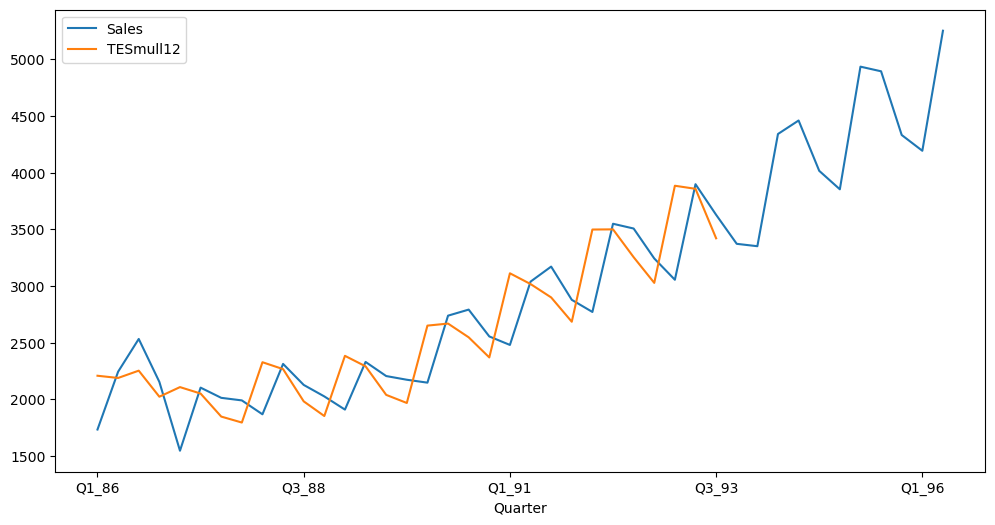

In [50]:
df[['Sales','TESmull12']].plot(figsize=(12,6))

In [51]:
test_predictions =fitted_model.forecast(10)

In [52]:
mean_squared_error(test_data,test_predictions)

222729.01765013128

In [53]:
rmse_TESmul12= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_TESmul12 

471.9417523912578

## Triple exponential smoothing with multiplicative seasonality and additive trend

In [54]:
tes_add_mul12 = ExponentialSmoothing(train_data['Sales'], trend='add',seasonal='mul',seasonal_periods=4)
fitted_model= tes_add_mul12.fit()
df['TESadd_mull12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12,TESmull12,TESadd_mull12
Quarter,,,,,,,
Q1_86,1734.827000,1734.827000,1925.567816,1926.069600,2314.503352,2209.267945,2215.606270
Q2_86,2244.960999,1811.347099,1990.769510,2017.546016,2217.574327,2189.721421,2208.682331
Q3_86,2533.804993,1919.715783,2139.833300,2186.852116,2226.937150,2254.144212,2277.343613
Q4_86,2154.962997,1955.002866,2164.184244,2205.670060,1993.286312,2024.352618,2043.436679
Q1_87,1547.818996,1893.925285,2003.520445,2025.770934,2227.187938,2109.029864,2116.343914


<AxesSubplot:xlabel='Quarter'>

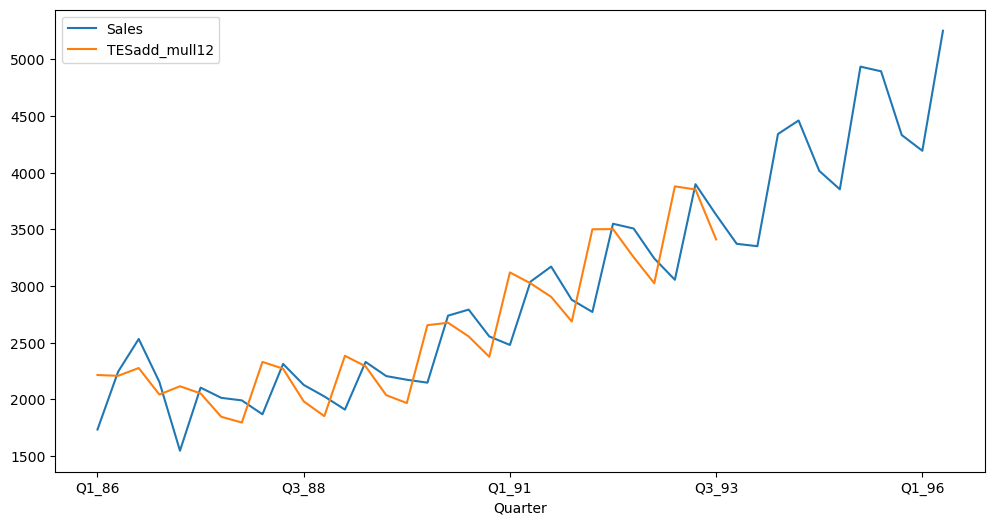

In [55]:
df[['Sales','TESadd_mull12']].plot(figsize=(12,6))

In [56]:
test_predictions =fitted_model.forecast(10)

In [57]:
mean_squared_error(test_data,test_predictions)

322814.8599564965

In [58]:
rmse_TES_add_mul12= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_TES_add_mul12 

568.1679856842486

In [59]:
tes_add_mul = ExponentialSmoothing(train_data['Sales'], trend='mul',seasonal='add',seasonal_periods=4)
fitted_model= tes_add_mul.fit()
df['TESmul_add12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12,TESmull12,TESadd_mull12,TESmul_add12
Quarter,,,,,,,,
Q1_86,1734.827000,1734.827000,1925.567816,1926.069600,2314.503352,2209.267945,2215.606270,2298.152309
Q2_86,2244.960999,1811.347099,1990.769510,2017.546016,2217.574327,2189.721421,2208.682331,2193.618324
Q3_86,2533.804993,1919.715783,2139.833300,2186.852116,2226.937150,2254.144212,2277.343613,2280.775590
Q4_86,2154.962997,1955.002866,2164.184244,2205.670060,1993.286312,2024.352618,2043.436679,1989.080439
Q1_87,1547.818996,1893.925285,2003.520445,2025.770934,2227.187938,2109.029864,2116.343914,2162.840764


<AxesSubplot:xlabel='Quarter'>

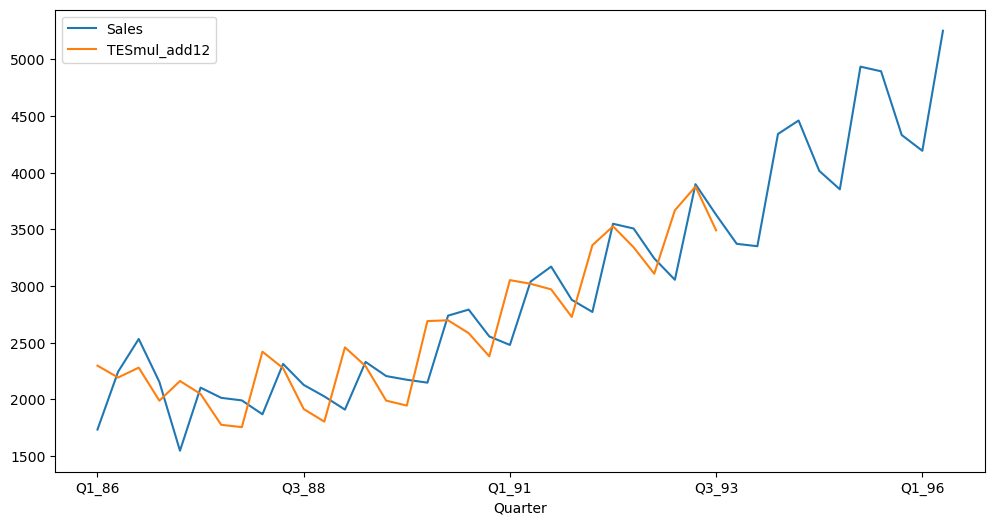

In [60]:
df[['Sales','TESmul_add12']].plot(figsize=(12,6))

In [61]:
test_predictions =fitted_model.forecast(10)

In [62]:
mean_squared_error(test_data,test_predictions)

315136.4523562131

In [63]:
rmse_TES_mul_add= np.sqrt (mean_squared_error(test_data,test_predictions))
rmse_TES_mul_add 

561.3701562749957

In [64]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp_Add","Double_Exp_Mul","Triple_Exp_Add","Triple_Exp_Mul_Mul","Triple_Exp_Add_Mul","Triple_Exp_Mul_Add"]),
        "RMSE":pd.Series([rmse_simple,rmse_DEadd,rmse_DEmul,rmse_TESadd12,rmse_TESmul12,rmse_TES_add_mul12,rmse_TES_mul_add])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE'], inplace=True, ignore_index=True)
table_evaluation


,Models,RMSE
0,Double_Exp_Mul,425.589912
1,Triple_Exp_Mul_Mul,471.941752
2,Double_Exp_Add,509.315239
3,Triple_Exp_Mul_Add,561.370156
4,Triple_Exp_Add_Mul,568.167986
5,Triple_Exp_Add,633.439405
6,Simple_Exp,1275.699456


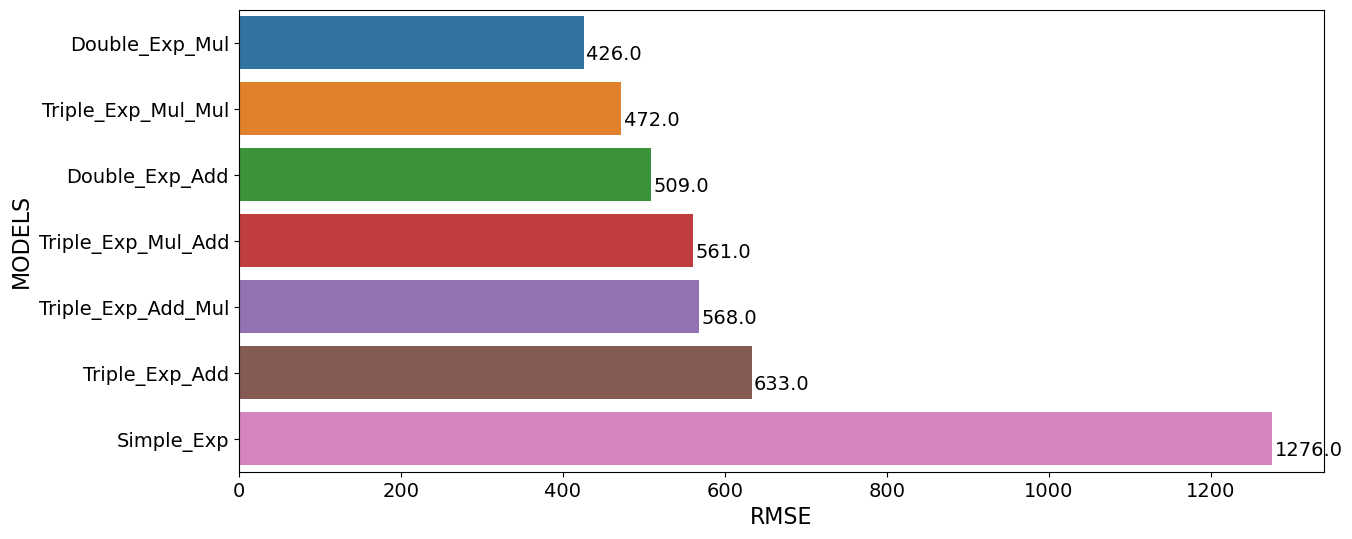

In [65]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='RMSE', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('RMSE', size=16)
axe.set_ylabel('MODELS', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)
plt.show()

## Triple Exponential Method with Multiplicative Seasonality`and Multiplicative Trend

In [66]:
final_model = ExponentialSmoothing(df['Sales'],trend='mul',seasonal='mul',seasonal_periods=4).fit()

In [67]:
forecast_predictions = final_model.forecast(10)

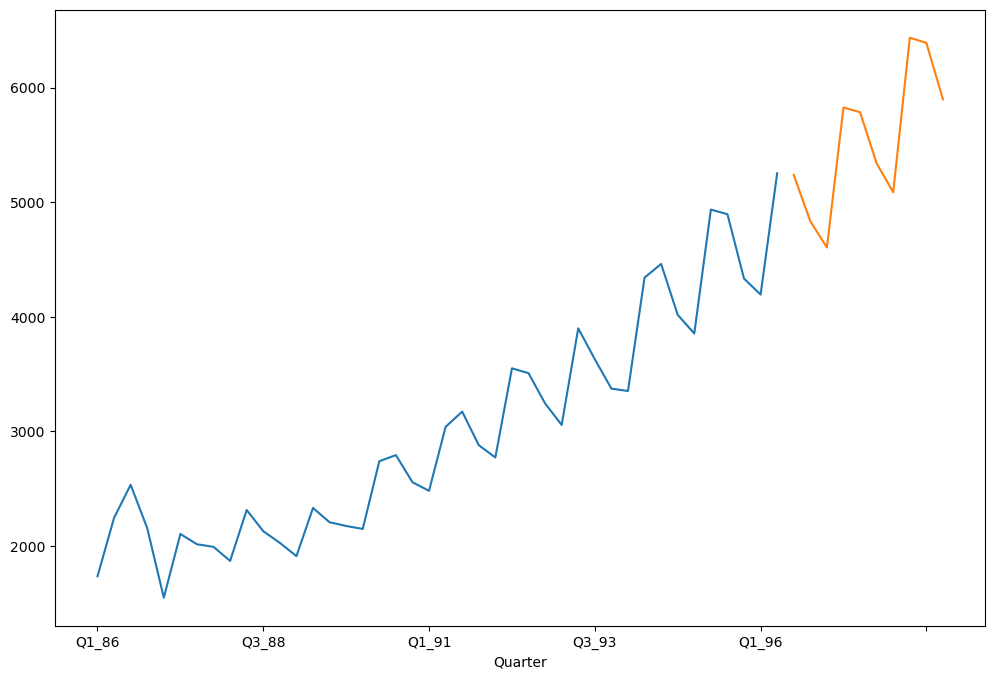

In [68]:
df['Sales'].plot(figsize=(12,8))
forecast_predictions.plot();

In [69]:
forecast_predictions

42    5237.939513
43    4833.823265
44    4604.961113
45    5826.266964
46    5785.757048
47    5339.375714
48    5086.577680
49    6435.615583
50    6390.868877
51    5897.802102
dtype: float64

# Trying with Months

In [70]:
DF= pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0 ,parse_dates=True)

In [71]:
DF['Quarter_Year'] = DF['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [72]:
DF.head()

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [73]:
# Coverting Quarter Years with Quarter Start Date Year (Date Month and Year)
DF['Date'] = (pd.to_datetime(DF['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
DF.head(4)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01


In [74]:
DF.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
DF.head()

,Sales,Date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01


In [75]:
DF.set_index('Date',inplace=True)
DF.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [76]:
DF.head()

,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


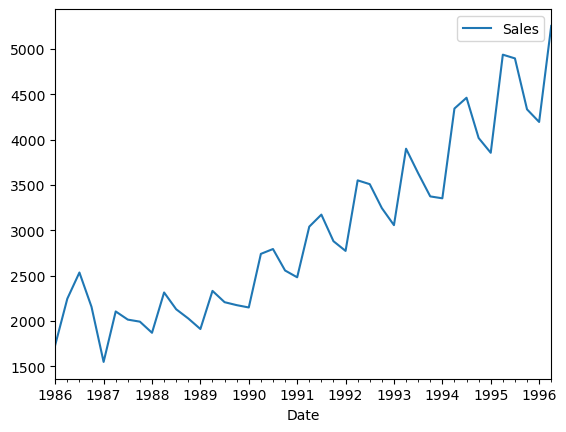

In [77]:
DF.plot()
plt.show()

### the trend is upward and the sessionality is not so clear but may be quadratic or exponential,

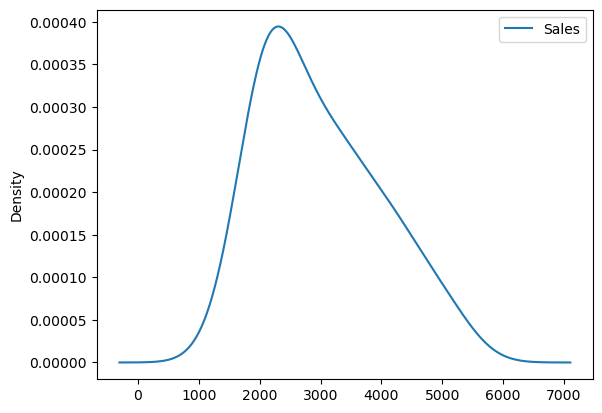

In [78]:
DF.plot(kind='kde')
plt.show()

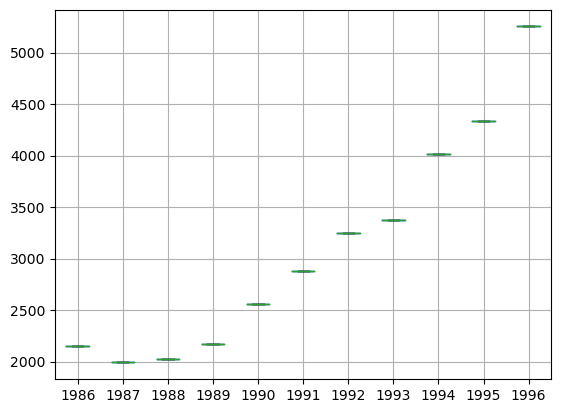

In [79]:
from pandas import Grouper
from pandas import DataFrame

groups = DF.groupby(Grouper(freq='q'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values.reshape(-1,)
years.boxplot()
plt.show()

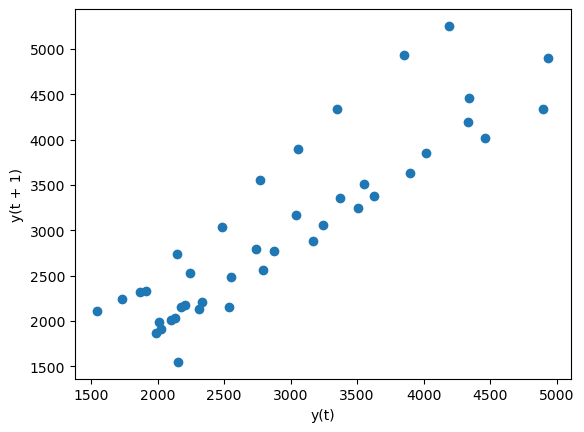

In [80]:
lag_plot(DF)
plt.show()

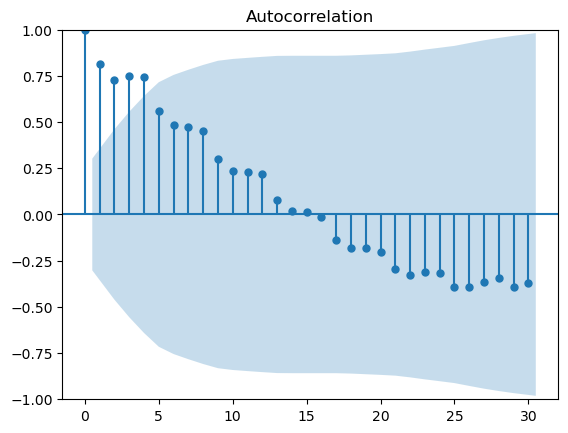

In [81]:
plot_acf(DF,lags=30)
plt.show()

## UpSampling

In [82]:
upsampled = DF.resample('M').mean()
print(upsampled.head(32))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN
1987-04-30  2104.411995
1987-05-31          NaN
1987-06-30          NaN
1987-07-31  2014.362999
1987-08-31          NaN
1987-09-30          NaN
1987-10-31  1991.746998
1987-11-30          NaN
1987-12-31          NaN
1988-01-31  1869.049999
1988-02-29          NaN
1988-03-31          NaN
1988-04-30  2313.631996
1988-05-31          NaN
1988-06-30          NaN
1988-07-31  2128.320000
1988-08-31          NaN


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


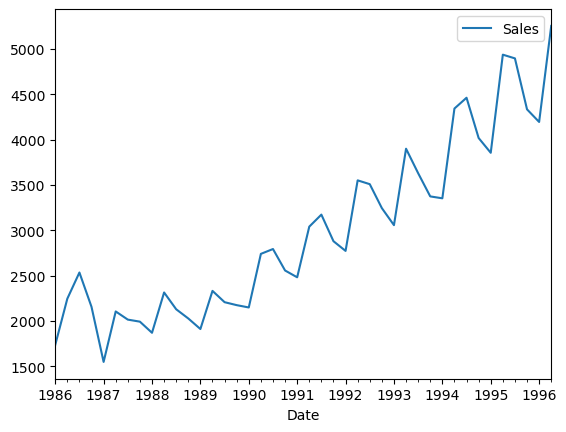

In [83]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(15))
interpolated.plot()
plt.show()

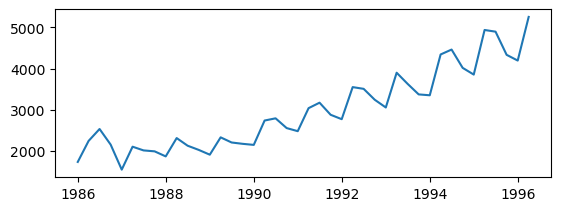

In [84]:
# line plot
plt.subplot(211)
plt.plot(DF)

## Square Root Transform

In [85]:
A = DataFrame(DF.values)
A.columns = ['Sales']
A['Sales'] = np.sqrt(A['Sales'])

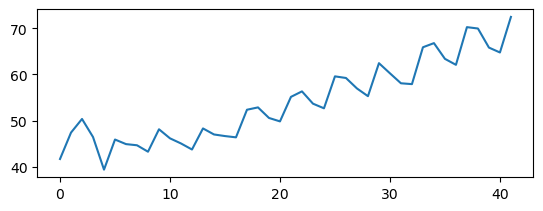

In [86]:
plt.subplot(211)
plt.plot(A['Sales'])
plt.show()

## Log Transform

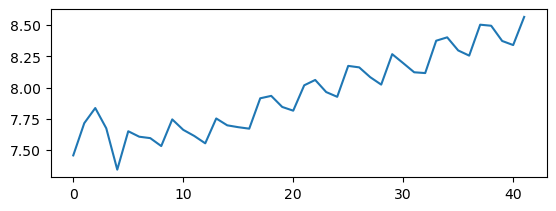

In [87]:
B = DataFrame(DF.values)
B.columns = ['Sales']
B['Sales'] = np.log(B['Sales'])

# line plot
plt.subplot(211)
plt.plot(B['Sales'])
plt.show()

In [88]:
Train = interpolated.head(112)
Test = interpolated.tail(12)

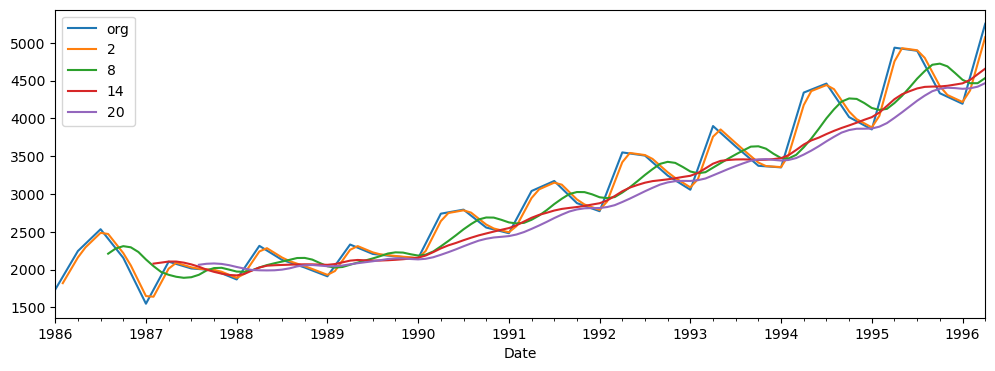

In [89]:
plt.figure(figsize=(12,4))
interpolated.Sales.plot(label="org")
for i in range(2,24,6):
    interpolated["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

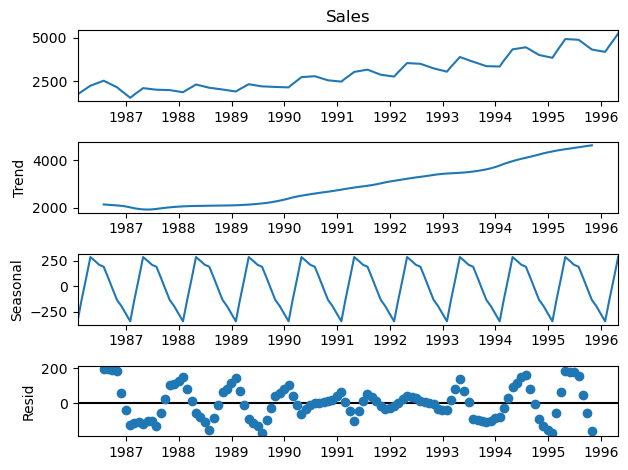

In [90]:
decompose_ts_add = seasonal_decompose(interpolated.Sales)
decompose_ts_add.plot()
plt.show()

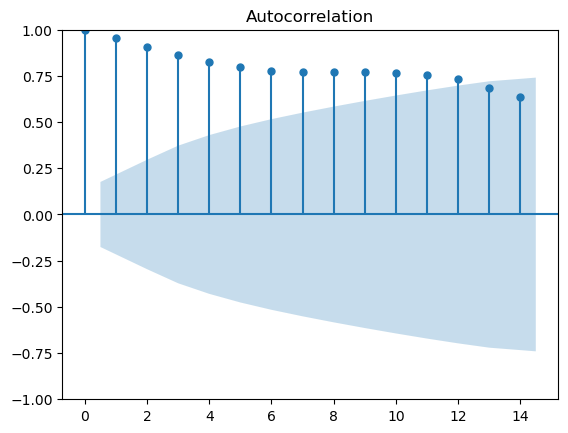

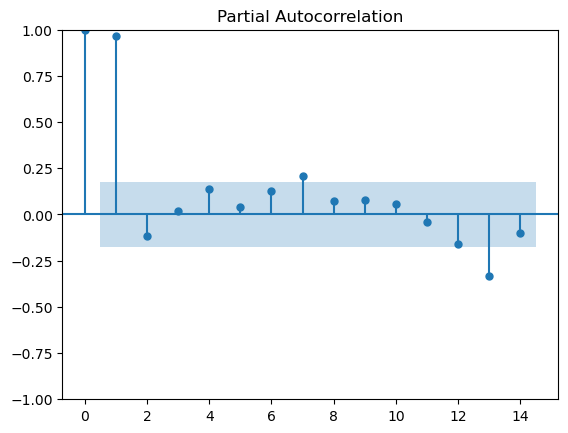

In [91]:
tsa_plots.plot_acf(interpolated.Sales,lags=14)
tsa_plots.plot_pacf(interpolated.Sales,lags=14)
plt.show()

## Evaluation Metric MAPE

In [92]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [93]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

7.528920151221705

In [94]:
rmse_ses = np.sqrt(mean_squared_error(pred_ses,Test.Sales))
rmse_ses

464.48125073131905

## Double Exponential Smoothing (trend-Add)

In [95]:
hw_model = ExponentialSmoothing(Train['Sales'], trend='add').fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

7.971543871164425

In [96]:
rmse_ds_add = np.sqrt(mean_squared_error(pred_hw,Test.Sales))
rmse_ds_add

406.71891649332053

## Double Exponential Smoothing (trend-mul)

In [97]:
hw_model_1 = ExponentialSmoothing(Train['Sales'], trend='mul').fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw_1 = hw_model_1.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw_1,Test.Sales)

8.75690911869433

In [98]:
rmse_ds_mul = np.sqrt(mean_squared_error(pred_hw_1,Test.Sales))
rmse_ds_mul

461.11069071873334

## Triple Exponential Smoothing with additive seasonality and additive trend

In [99]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.072352949061625

In [100]:
rmse_add_add = np.sqrt(mean_squared_error(pred_hwe_add_add,Test.Sales))
rmse_add_add

258.70851103076546

## Triple exponential smoothing with multiplicative seasonality and additive trend

In [101]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.767933956510746

In [102]:
rmse_mul_add = np.sqrt(mean_squared_error(pred_hwe_mul_add,Test.Sales))
rmse_mul_add

249.3716445007406

## Triple exponential smoothing with multiplicative seasonality and multiplicate trend

In [103]:
hwe_model_mul_mul = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_mul,Test.Sales)

6.823559142102785

In [104]:
rmse_mul_mul = np.sqrt(mean_squared_error(pred_hwe_mul_mul,Test.Sales))
rmse_mul_mul

353.06126134550556

## Triple exponential smoothing with additive seasonality and multiplicative trend

In [105]:
hwe_model_add_mul = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_add_mul = hwe_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_mul,Test.Sales)

6.655172778120771

In [106]:
rmse_add_mul = np.sqrt(mean_squared_error(pred_hwe_add_mul,Test.Sales))
rmse_add_mul

347.218886861189

In [107]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp_Add","Double_Exp_Mul","Triple_Exp_Add","Triple_Exp_Mul_Mul","Triple_Exp_Add_Mul","Triple_Exp_Mul_Add"]),
        "RMSE":pd.Series([rmse_ses,rmse_ds_add,rmse_ds_mul,rmse_add_add,rmse_mul_mul,rmse_add_mul,rmse_mul_add])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE'], inplace=True, ignore_index=True)
table_evaluation

,Models,RMSE
0,Triple_Exp_Mul_Add,249.371645
1,Triple_Exp_Add,258.708511
2,Triple_Exp_Add_Mul,347.218887
3,Triple_Exp_Mul_Mul,353.061261
4,Double_Exp_Add,406.718916
5,Double_Exp_Mul,461.110691
6,Simple_Exp,464.481251


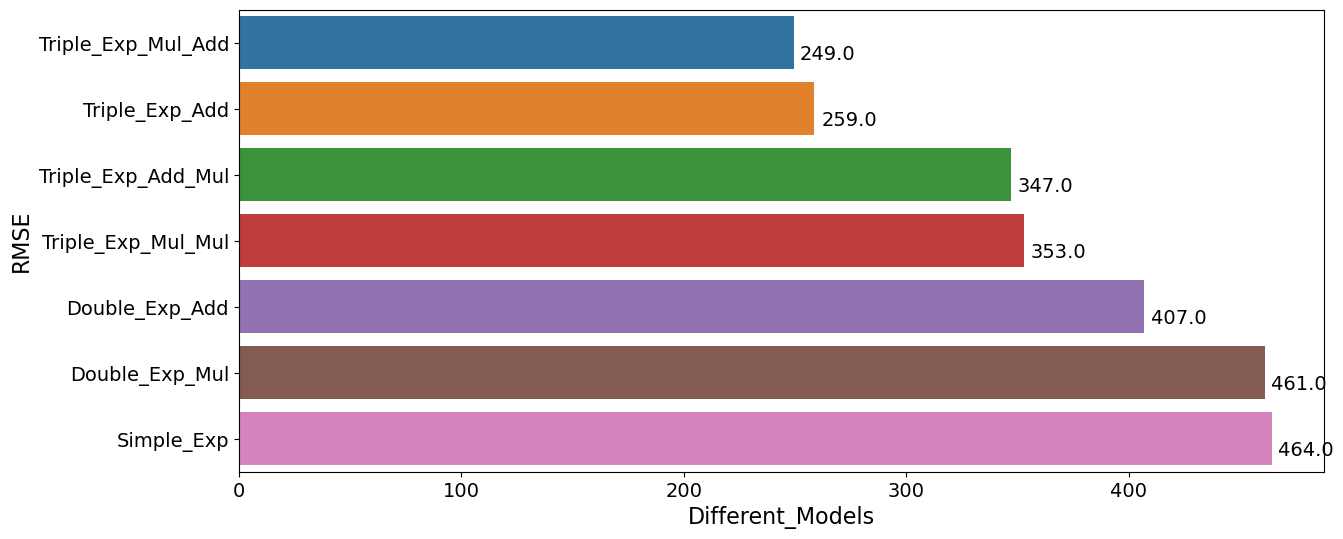

In [108]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='RMSE', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)
plt.show()

## Final Model by combining train and test

In [109]:
Final = ExponentialSmoothing(interpolated["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [110]:
forecast_predictions= Final.forecast(12)
forecast_predictions

1996-05-31    5223.377587
1996-06-30    5196.754964
1996-07-31    5169.490306
1996-08-31    4992.791240
1996-09-30    4812.085186
1996-10-31    4622.807246
1996-11-30    4494.160504
1996-12-31    4345.259925
1997-01-31    4208.172292
1997-02-28    4550.924772
1997-03-31    4900.923997
1997-04-30    5254.613009
Freq: M, dtype: float64

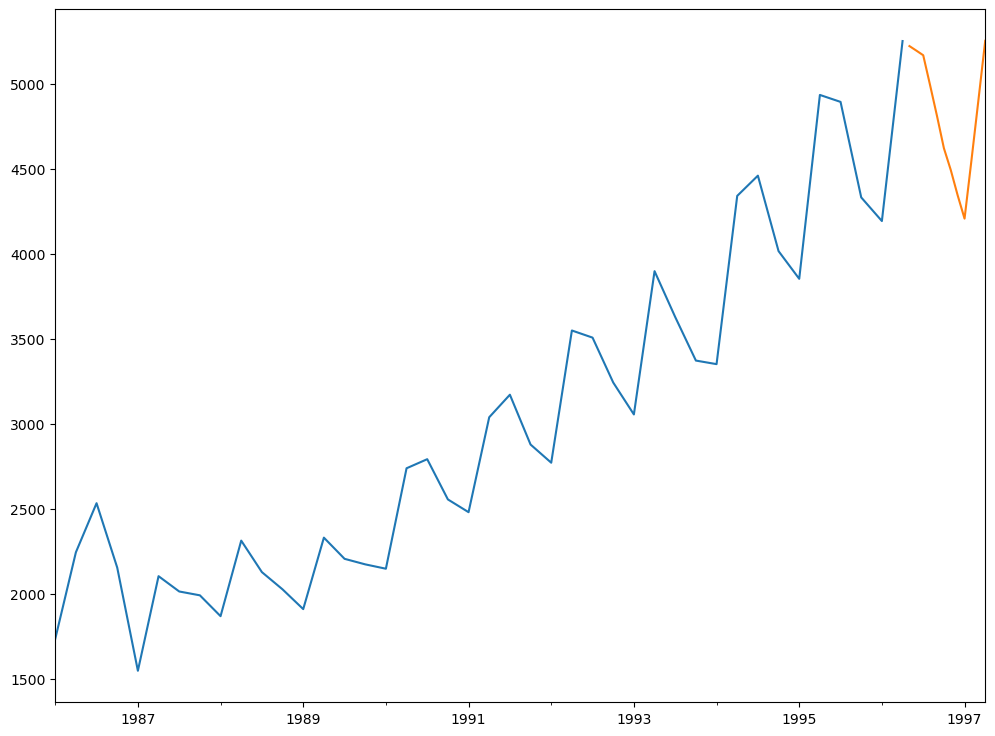

In [111]:
DF['Sales'].plot(figsize=(12,9))
forecast_predictions.plot();